In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv("public_health_surveillance_dataset.csv")

In [11]:
df.head()

,Age,Gender,Location,Ethnicity,SES,Chronic_Conditions,Vaccination_Status,Medical_History,Immunity_Level,Reported_Symptoms,...,Hospital_Capacity,Healthcare_Personnel_Availability,Resource_Utilization,Date_of_Data_Collection,Daily_New_Cases,Vaccination_Campaign_Dates,Outbreak_Status,Infection_Risk_Level,Disease_Severity,Hospitalization_Requirement
0,51,Male,Urban,Ethnicity3,Low,0,0,NaN,Medium,Mild,...,Available,Adequate,3.737815,2023-02-23,17,2023-12-07,No Outbreak,Low Risk,Mild,Requires Hospitalization
1,92,Male,Urban,Ethnicity2,Low,1,0,NaN,Medium,Severe,...,Available,Scarce,86.838729,2024-02-29,17,2023-08-01,No Outbreak,Medium Risk,Mild,Requires Hospitalization
2,14,Male,Urban,Ethnicity3,Low,0,1,NaN,Low,NaN,...,Available,Adequate,65.644500,2023-12-20,20,2023-12-04,Ongoing Outbreak,Low Risk,Moderate,No Hospitalization
3,71,Female,Urban,Ethnicity2,Low,0,0,NaN,Medium,Moderate,...,Limited,Scarce,82.013095,2023-01-28,19,2024-03-19,No Outbreak,Low Risk,Severe,No Hospitalization
4,60,Female,Urban,Ethnicity1,Low,0,0,NaN,Low,Mild,...,Available,Adequate,56.957994,2023-03-26,18,2023-12-27,No Outbreak,Low Risk,Mild,No Hospitalization


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43689 entries, 0 to 43688
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                43689 non-null  int64  
 1   Gender                             43689 non-null  object 
 2   Location                           43689 non-null  object 
 3   Ethnicity                          43689 non-null  object 
 4   SES                                43689 non-null  object 
 5   Chronic_Conditions                 43689 non-null  int64  
 6   Vaccination_Status                 43689 non-null  int64  
 7   Medical_History                    17430 non-null  object 
 8   Immunity_Level                     43689 non-null  object 
 9   Reported_Symptoms                  21837 non-null  object 
 10  Diagnosis                          13050 non-null  object 
 11  Testing_Results                    43689 non-null  obj

In [13]:
df.describe()

,Age,Chronic_Conditions,Vaccination_Status,Temperature,AQI,Humidity,Compliance_with_Health_Guidelines,Transmission_Rate,Mortality_Rate,Case_Fatality_Ratio,Resource_Utilization,Daily_New_Cases
count,43689.000000,43689.000000,43689.000000,43689.000000,43689.000000,43689.000000,43689.000000,43689.000000,4.368900e+04,43689.000000,43689.000000,43689.000000
mean,49.941335,0.299984,0.200897,29.939132,74.843164,49.871732,0.700886,1.747335,2.497512e-02,0.049624,49.948094,20.002449
std,29.161997,0.458256,0.400676,10.003867,66.481341,23.037879,0.457875,0.719657,1.440608e-02,0.028755,28.887928,4.496903
min,0.000000,0.000000,0.000000,-13.587863,0.000000,10.000255,0.000000,0.500019,3.546078e-07,0.000003,0.001450,4.000000
25%,25.000000,0.000000,0.000000,23.132805,25.000000,29.944309,0.000000,1.128572,1.256134e-02,0.024739,24.963953,17.000000
50%,50.000000,0.000000,0.000000,29.963278,50.000000,49.826561,1.000000,1.742985,2.496072e-02,0.049372,50.097147,20.000000
75%,75.000000,1.000000,0.000000,36.658827,112.000000,69.618319,1.000000,2.367407,3.743354e-02,0.074530,74.953616,23.000000
max,100.000000,1.000000,1.000000,74.994492,300.000000,89.997717,1.000000,2.999862,4.999859e-02,0.099999,99.997555,41.000000


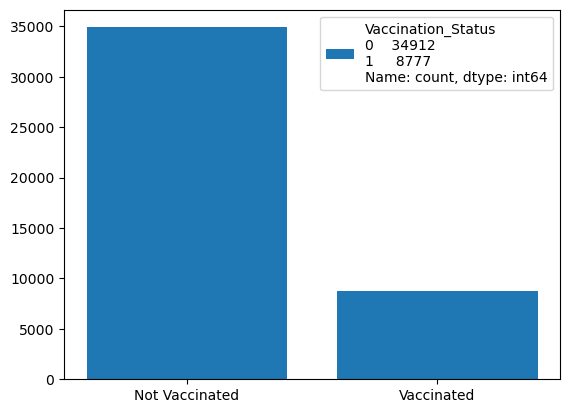

In [63]:
plt.bar(x=df['Vaccination_Status'].value_counts().index,
        height=df['Vaccination_Status'].value_counts().values)
plt.xticks(ticks=[0, 1], labels=['Not Vaccinated', 'Vaccinated'], rotation=0)
plt.legend( labels=[df["Vaccination_Status"].value_counts()])
plt.show()

C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_26660\1751608024.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_vs_chronic = df.groupby('Age_Bracket')['Chronic_Conditions'].mean()


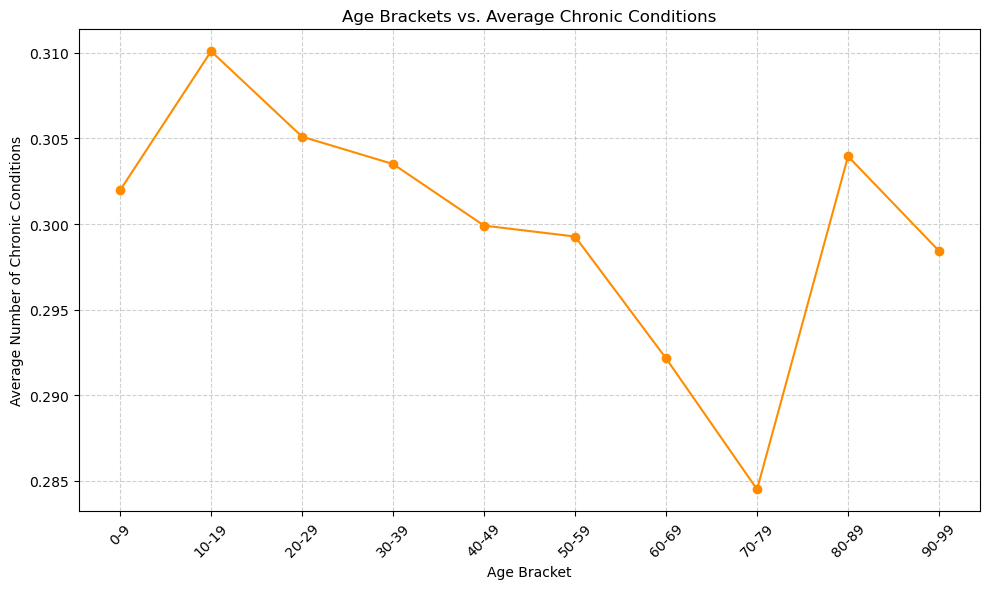

In [30]:
# Creating age brackets (0-9, 10-19, 20-29, etc.)
df['Age_Bracket'] = pd.cut(df['Age'], bins=np.arange(0, df['Age'].max() + 10, 10), right=False)

# Group by age bracket and calculate the average number of chronic conditions
age_bracket_vs_chronic = df.groupby('Age_Bracket')['Chronic_Conditions'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
age_bracket_vs_chronic.plot(kind='line', marker='o', color='darkorange')

# Customize the plot
plt.title('Age Brackets vs. Average Chronic Conditions')
plt.xlabel('Age Bracket')
plt.ylabel('Average Number of Chronic Conditions')
plt.xticks(ticks=range(len(age_bracket_vs_chronic)), labels=[f'{int(interval.left)}-{int(interval.right)-1}' for interval in age_bracket_vs_chronic.index], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


In [24]:
df.head()

,Age,Gender,Location,Ethnicity,SES,Chronic_Conditions,Vaccination_Status,Medical_History,Immunity_Level,Reported_Symptoms,...,Healthcare_Personnel_Availability,Resource_Utilization,Date_of_Data_Collection,Daily_New_Cases,Vaccination_Campaign_Dates,Outbreak_Status,Infection_Risk_Level,Disease_Severity,Hospitalization_Requirement,Age_Bracket
0,51,Male,Urban,Ethnicity3,Low,0,0,NaN,Medium,Mild,...,Adequate,3.737815,2023-02-23,17,2023-12-07,No Outbreak,Low Risk,Mild,Requires Hospitalization,"[50, 60)"
1,92,Male,Urban,Ethnicity2,Low,1,0,NaN,Medium,Severe,...,Scarce,86.838729,2024-02-29,17,2023-08-01,No Outbreak,Medium Risk,Mild,Requires Hospitalization,"[90, 100)"
2,14,Male,Urban,Ethnicity3,Low,0,1,NaN,Low,NaN,...,Adequate,65.644500,2023-12-20,20,2023-12-04,Ongoing Outbreak,Low Risk,Moderate,No Hospitalization,"[10, 20)"
3,71,Female,Urban,Ethnicity2,Low,0,0,NaN,Medium,Moderate,...,Scarce,82.013095,2023-01-28,19,2024-03-19,No Outbreak,Low Risk,Severe,No Hospitalization,"[70, 80)"
4,60,Female,Urban,Ethnicity1,Low,0,0,NaN,Low,Mild,...,Adequate,56.957994,2023-03-26,18,2023-12-27,No Outbreak,Low Risk,Mild,No Hospitalization,"[60, 70)"


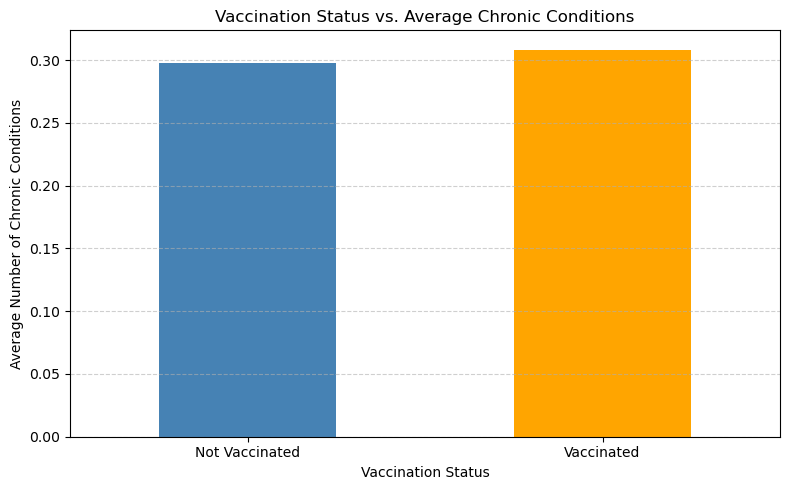

In [67]:
# Group the data by 'Vaccination_Status' and calculate the average number of chronic conditions for each group
vaccination_vs_chronic = df.groupby('Vaccination_Status')['Chronic_Conditions'].mean()

# Create a bar chart
plt.figure(figsize=(8, 5))
vaccination_vs_chronic.plot(kind='bar', color=['steelblue', 'orange'])

# Customize the plot
plt.title('Vaccination Status vs. Average Chronic Conditions')
plt.xlabel('Vaccination Status')
plt.ylabel('Average Number of Chronic Conditions')
plt.xticks(ticks=[0, 1], labels=['Not Vaccinated', 'Vaccinated'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_26660\1966826989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vaccination_counts = df.groupby(['Age_Bracket', 'Vaccination_Status']).size().unstack(fill_value=0)


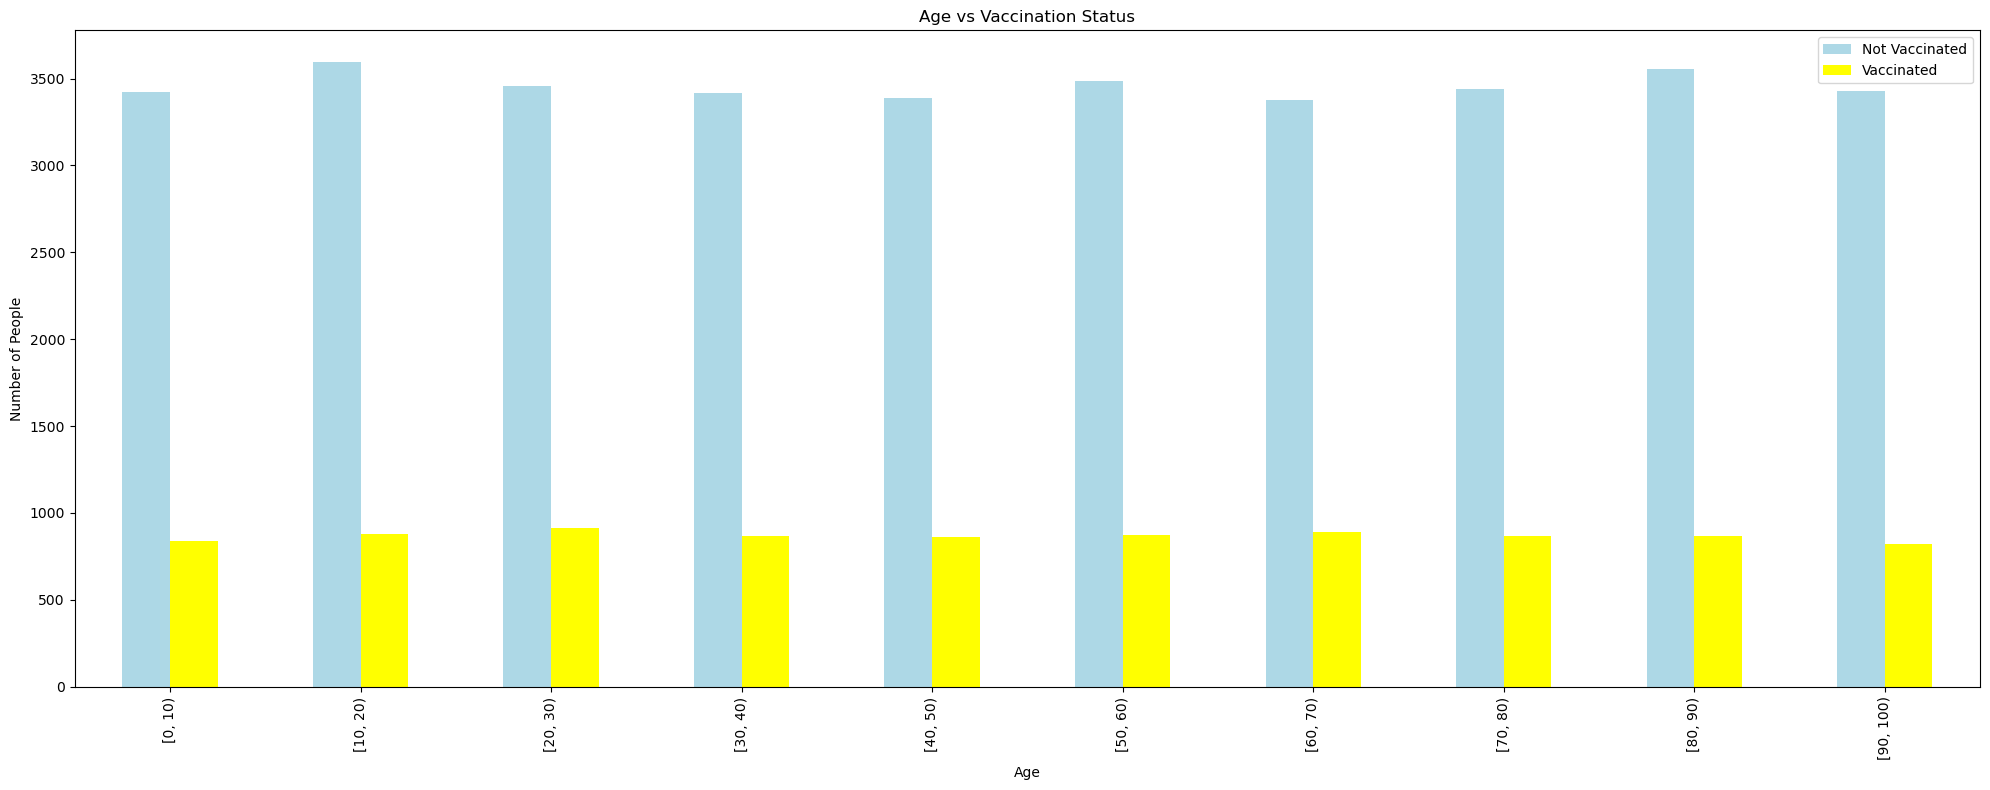

In [53]:


# Count the number of vaccinated (1) and unvaccinated (0) people for each age
age_vaccination_counts = df.groupby(['Age_Bracket', 'Vaccination_Status']).size().unstack(fill_value=0)

# Plot a stacked bar chart
age_vaccination_counts.plot(kind='bar', stacked=False, figsize=(20, 8), color=['lightblue', 'yellow'])

# Customize the plot
plt.title('Age vs Vaccination Status')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.legend( labels=['Not Vaccinated', 'Vaccinated'])
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\SAKSHI\AppData\Local\Temp\ipykernel_26660\421172930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_immunity = df.groupby(['Age_Bracket', 'Immunity_Level']).size().unstack(fill_value=0)


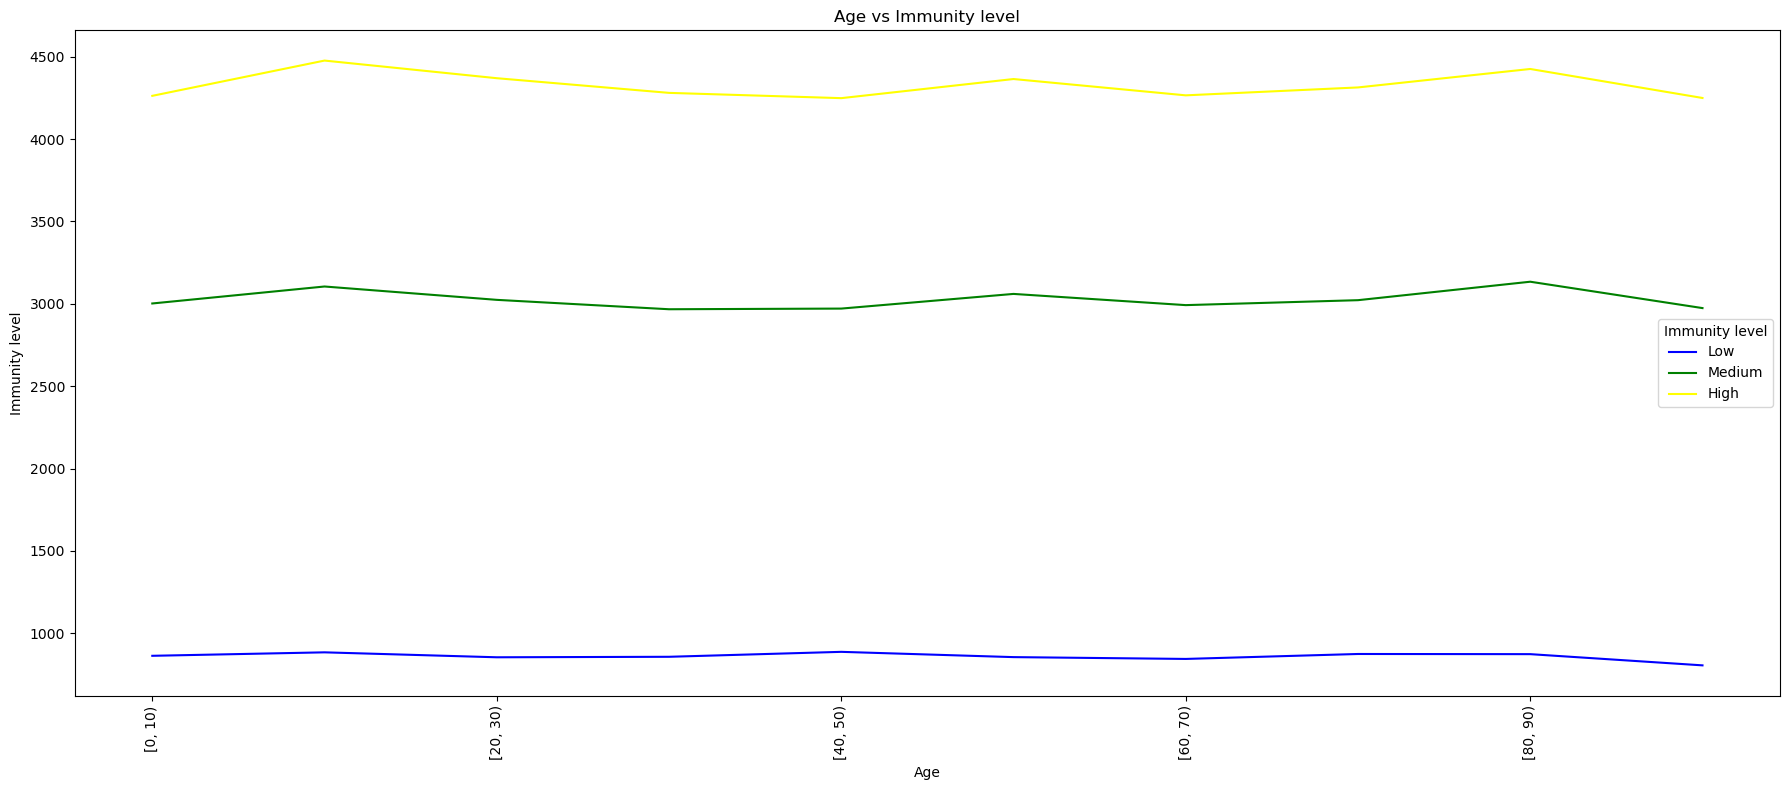

In [69]:
import seaborn as sns

# Count the number of vaccinated (1) and unvaccinated (0) people for each age
age_immunity = df.groupby(['Age_Bracket', 'Immunity_Level']).size().unstack(fill_value=0)

# Plot a stacked bar chart
age_immunity.plot(kind='line', stacked=True, figsize=(18, 8), color=['blue', 'green','yellow'])

# Customize the plot
plt.title('Age vs Immunity level')
plt.xlabel('Age')
plt.ylabel('Immunity level')
plt.xticks(rotation=90)
plt.legend(title='Immunity level', labels=['Low', 'Medium','High'])
plt.tight_layout()

# Show the plot
plt.show()




In [40]:
df["Immunity_Level"].value_counts()

Immunity_Level
Low       21879
Medium    13123
High       8687
Name: count, dtype: int64

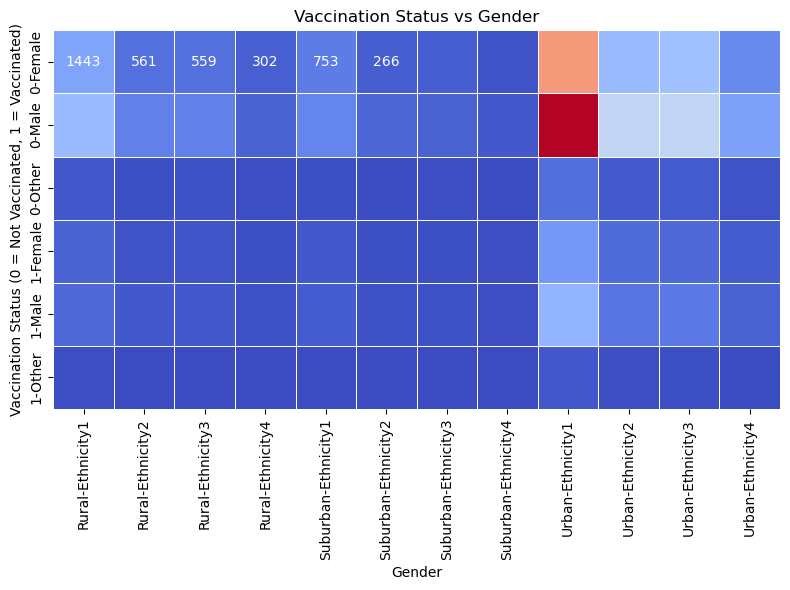

In [75]:
import seaborn as sns
# Create a contingency table (cross-tab) for Vaccination Status vs. Gender
contingency_table = pd.crosstab(index=[df['Vaccination_Status'], df['Gender']], 
                                columns=[df['Location'], df['Ethnicity']])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=False, linewidths=0.5)

# Customize the plot
plt.title('Vaccination Status vs Gender')
plt.xlabel('Gender')
plt.ylabel('Vaccination Status (0 = Not Vaccinated, 1 = Vaccinated)')

# Show the plot
plt.tight_layout()
plt.show()


In [77]:
from scipy.stats import chi2_contingency

# Create a contingency table for Vaccination Status vs Disease Transmission
contingency_table = pd.crosstab(df['Vaccination_Status'], df['Outbreak_Status'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

# If p-value is less than 0.05, the result is statistically significant
if p < 0.05:
    print("There is a significant relationship between Vaccination Status and Disease Transmission.")
else:
    print("No significant relationship between Vaccination Status and Disease Transmission.")


Chi-Square Statistic: 1.3882508568534875
P-value: 0.49951111523082925
No significant relationship between Vaccination Status and Disease Transmission.


In [79]:
from scipy.stats import ttest_ind

# Split data into two groups: Chronic Condition Yes vs No
chronic_yes = df[df['Chronic_Conditions'] == 'Yes']['Immunity_Level']
chronic_no = df[df['Chronic_Conditions'] == 'No']['Immunity_Level']

# Perform T-test
t_stat, p_val = ttest_ind(chronic_yes, chronic_no)

# Print the result
print(f'T-statistic: {t_stat}, P-value: {p_val}')

# If p-value is less than 0.05, reject the null hypothesis
if p_val < 0.05:
    print("Significant difference in immunity levels between people with and without chronic conditions.")
else:
    print("No significant difference in immunity levels.")


T-statistic: nan, P-value: nan
No significant difference in immunity levels.


In [81]:
# Create a contingency table for Gender vs Reported Symptoms
contingency_table = pd.crosstab(df['Gender'], df['Reported_Symptoms'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("Gender significantly affects symptom reporting.")
else:
    print("No significant difference in symptom reporting by gender.")


Chi-Square Statistic: 2.2105616762902676
P-value: 0.6970961250938541
No significant difference in symptom reporting by gender.


In [83]:
# CAMPAIGN DATES VS VACCINATION STATUS

# Convert campaign date to a categorical variable (before or after campaign)
campaign_cutoff = '2024-01-01'  # Use the campaign start date as cutoff (adjust as needed)
df['Campaign_Period'] = df['Vaccination_Campaign_Dates'].apply(lambda x: 'Before' if x < campaign_cutoff else 'After')

# Create a contingency table for Vaccination Status vs Campaign Period
contingency_table = pd.crosstab(df['Vaccination_Status'], df['Campaign_Period'])

# Perform Chi-Square Test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between Vaccination Status and Campaign Period.")
else:
    print("No significant relationship between Vaccination Status and Campaign Period.")


Chi-Square Statistic: 1.5147877441053788
P-value: 0.21840997014892116
No significant relationship between Vaccination Status and Campaign Period.


In [84]:
# CAMPAIGN DATES VS DAILY NEW CASES

In [88]:
# Create a contingency table for Outbreak Status vs Campaign Period
contingency_table_outbreak = pd.crosstab(df['Outbreak_Status'], df['Campaign_Period'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table_outbreak)

# Print results
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between Outbreak Status and Campaign Period.")
else:
    print("No significant relationship between Outbreak Status and Campaign Period.")


Chi-Square Statistic: 2.2228882678892052
P-value: 0.32908337727875775
No significant relationship between Outbreak Status and Campaign Period.


Chi-Square Statistic: 0.200338379066143
P-value: 0.9046843419654961
No significant relationship between SES and Chronic Disease.


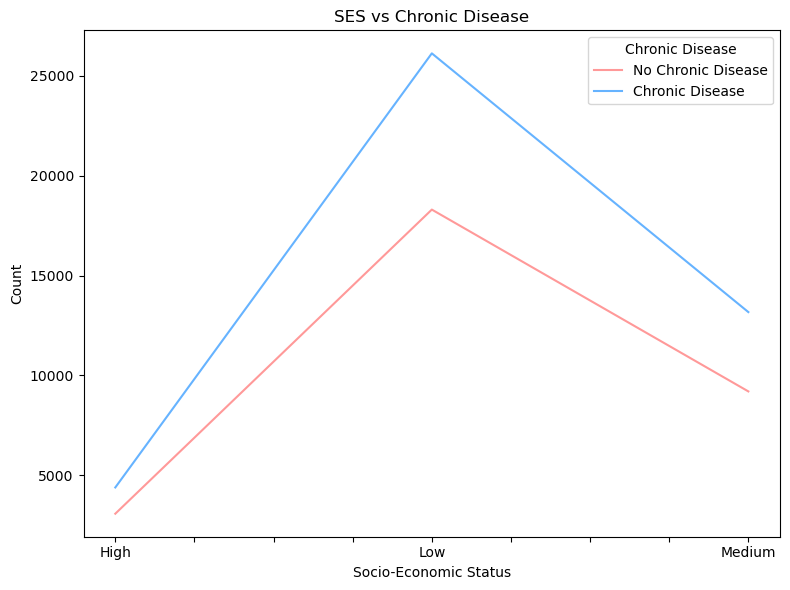

In [91]:
# relation betwwen socio ecomic status and chronic disease

# Create a contingency table for SES vs Chronic Disease
contingency_table_ses_chronic = pd.crosstab(df['SES'], df['Chronic_Conditions'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table_ses_chronic)

# Print results
print(f'Chi-Square Statistic: {chi2}')
print(f'P-value: {p}')

if p < 0.05:
    print("There is a significant relationship between SES and Chronic Disease.")
else:
    print("No significant relationship between SES and Chronic Disease.")
    
# Visualization: Stacked bar chart for SES vs Chronic Disease
contingency_table_ses_chronic.plot(kind='line', stacked=True, figsize=(8,6), color=['#ff9999', '#66b3ff'])
plt.title('SES vs Chronic Disease')
plt.xlabel('Socio-Economic Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Chronic Disease', labels=['No Chronic Disease', 'Chronic Disease'])
plt.tight_layout()
plt.show()


In [92]:
df['Healthcare_Personnel_Availability'].value_counts()

Healthcare_Personnel_Availability
Adequate    34924
Scarce       8765
Name: count, dtype: int64

In [94]:
#    testing chronic conditions for low socia-economic-status
# making new column data for Low SES individuals
low_ses_df = df[df['SES'] == 'Low']


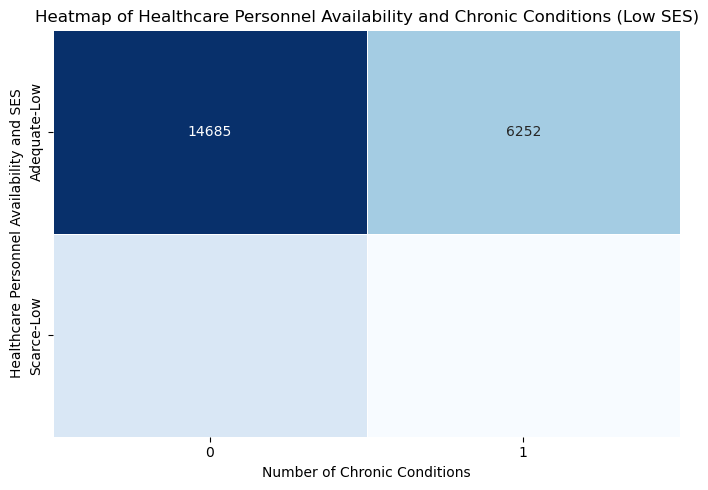

In [100]:
# Create a contingency table for Healthcare Personnel Availability and Chronic Conditions
contingency_table = pd.crosstab([low_ses_df['Healthcare_Personnel_Availability'], low_ses_df['SES']], low_ses_df['Chronic_Conditions'])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False, linewidths=0.5)

# Customize the plot
plt.title('Heatmap of Healthcare Personnel Availability and Chronic Conditions (Low SES)')
plt.xlabel('Number of Chronic Conditions')
plt.ylabel('Healthcare Personnel Availability and SES')
plt.tight_layout()

# Show plot
plt.show()


In [101]:
from scipy.stats import chi2_contingency

# Create a contingency table for Healthcare Personnel Availability vs Chronic Conditions
contingency_table = pd.crosstab(low_ses_df['Healthcare_Personnel_Availability'], low_ses_df['Chronic_Conditions'])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f'Chi-Square Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("There is a significant relationship between Healthcare Personnel Availability and Chronic Conditions in Low SES.")
else:
    print("There is no significant relationship between Healthcare Personnel Availability and Chronic Conditions in Low SES.")


Chi-Square Statistic: 0.27968841530728006
P-value: 0.596905513095318
There is no significant relationship between Healthcare Personnel Availability and Chronic Conditions in Low SES.


In [103]:
from scipy.stats import f_oneway

# Group by Healthcare Personnel Availability and Chronic Conditions
adequate_group = low_ses_df[low_ses_df['Healthcare_Personnel_Availability'] == 'Adequate']['Chronic_Conditions']
scarce_group = low_ses_df[low_ses_df['Healthcare_Personnel_Availability'] == 'Scarce']['Chronic_Conditions']

# Perform ANOVA to compare means
f_stat, p_value = f_oneway(adequate_group, scarce_group)

# Print results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("There is a significant difference in the number of chronic conditions based on Healthcare Personnel Availability.")
else:
    print("There is no significant difference in the number of chronic conditions based on Healthcare Personnel Availability.")


F-statistic: 0.29786545023304545
P-value: 0.5852283569371186
There is no significant difference in the number of chronic conditions based on Healthcare Personnel Availability.


In [106]:
import statsmodels.api as sm

# Prepare the data for regression (ensure the columns are numeric)
low_ses_df = pd.get_dummies(low_ses_df, drop_first=True)  # Convert categorical variables to dummy variables

# Define the independent variables and dependent variable
X = low_ses_df[['Healthcare_Personnel_Availability_Scarce', 'Vaccination_Status']]  # Example variables
y = low_ses_df['Chronic_Conditions']

# Add constant to the independent variables matrix for the intercept term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).